# This notebook generates LG data for widom scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
x, z, t, r, j, u = symbols('x z t r j u')

### Setup domain for $r$ and $j$

In [2]:
#Amount of r points
Nr=30
#Amount of j points
Nj=5
#Minimum for r points
mr=0.01
#Maximum for r points
Mr=20
#Minimum for j points
mj=0.1
#Maximum for j points
Mj=1

In [3]:
#Equation for phi
a=solve(r*z + u*z**3-j,z)
#Equation for psi
b=solve(x*t+u*t**3-1,t)


### Setup parameter u

In [4]:
#Define parameter u
u=10

### Find explicit expression for $\phi$ and $\psi$

In [5]:
#all roots for phi (We need the real one)
a

[r/(u*(-27*j/(2*u) + sqrt(729*j**2/u**2 + 108*r**3/u**3)/2)**(1/3)) - (-27*j/(2*u) + sqrt(729*j**2/u**2 + 108*r**3/u**3)/2)**(1/3)/3,
 r/(u*(-1/2 - sqrt(3)*I/2)*(-27*j/(2*u) + sqrt(729*j**2/u**2 + 108*r**3/u**3)/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(-27*j/(2*u) + sqrt(729*j**2/u**2 + 108*r**3/u**3)/2)**(1/3)/3,
 r/(u*(-1/2 + sqrt(3)*I/2)*(-27*j/(2*u) + sqrt(729*j**2/u**2 + 108*r**3/u**3)/2)**(1/3)) - (-1/2 + sqrt(3)*I/2)*(-27*j/(2*u) + sqrt(729*j**2/u**2 + 108*r**3/u**3)/2)**(1/3)/3]

In [6]:
#all roots for psi (We need the real one)
b

[-(-1/2 - sqrt(3)*I/2)*(sqrt(729/u**2 + 108*x**3/u**3)/2 - 27/(2*u))**(1/3)/3 + x/(u*(-1/2 - sqrt(3)*I/2)*(sqrt(729/u**2 + 108*x**3/u**3)/2 - 27/(2*u))**(1/3)),
 -(-1/2 + sqrt(3)*I/2)*(sqrt(729/u**2 + 108*x**3/u**3)/2 - 27/(2*u))**(1/3)/3 + x/(u*(-1/2 + sqrt(3)*I/2)*(sqrt(729/u**2 + 108*x**3/u**3)/2 - 27/(2*u))**(1/3)),
 -(sqrt(729/u**2 + 108*x**3/u**3)/2 - 27/(2*u))**(1/3)/3 + x/(u*(sqrt(729/u**2 + 108*x**3/u**3)/2 - 27/(2*u))**(1/3))]

In [7]:
#Definition phi
def phi(r,j,u):
    return r/(u*(-27*j/(2*u) + sqrt(729*j**2/u**2 + 108*r**3/u**3)/2)**(1/3)) - (-27*j/(2*u) + sqrt(729*j**2/u**2 + 108*r**3/u**3)/2)**(1/3)/3

In [8]:
#Definition psi
def psi(x,u):
    return  -(sqrt(729/u**2 + 108*x**3/u**3)/2 - 27/(2*u))**(1/3)/3 + x/(u*(sqrt(729/u**2 + 108*x**3/u**3)/2 - 27/(2*u))**(1/3))

### Plotting $\phi$ and $\psi$

In [9]:
#Setting variables r and j
r=np.linspace(mr,Mr,Nr)
j=np.linspace(mj,Mj,Nj)

Text(0.5, 1.0, 'Plot of $\\phi$ against r and several j')

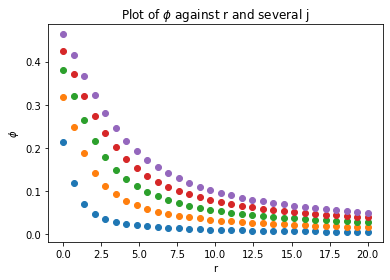

In [10]:
#Plot phi for different values of r and j (and fixed u)
v=np.zeros(np.size(r))
curves_data=np.zeros((np.size(r),np.size(j)))
for m in range(np.size(j)):
    for k in range(np.size(r)):
        curves_data[k,m]=phi(r[k],j[m],u)
    plt.plot(r,curves_data[:,m],'o')

    
plt.xlabel('r')
plt.ylabel('$\phi$')
plt.title('Plot of $\phi$ against r and several j')
    
        

Text(0.5, 1.0, 'Plot of $(z,\\psi(z))$ and renormalized $(r/j^{2/3},\\phi/j^{1/3})$')

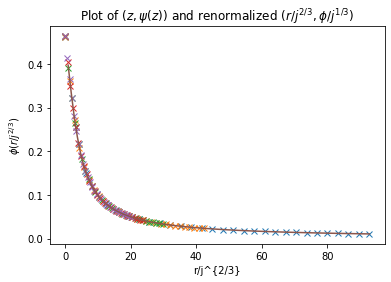

In [11]:
#Plot of renormalized phi for different values of r and j (and fixed u)
#Notice the collapsed curve
for m in range(np.size(j)):
    plt.plot(r/(j[m]**(2/3)),curves_data[:,m]/(j[m]**(1/3)),'x')
    
x=np.linspace(0,r[-1]/j[0]**(2/3),100)

#Plot of Psi for fixed b
v=np.zeros(np.size(x))
for k in range(np.size(x)):
    v[k]=psi(x[k],u)
plt.plot(x,v)
plt.xlabel('r/j^{2/3}')
plt.ylabel('$\phi(r/j^{2/3})$')
plt.title('Plot of $(z,\psi(z))$ and renormalized $(r/j^{2/3},\phi/j^{1/3})$')
    

### Saving dataframe to dphi_u.xslx

###### underline in name stores the value for parameter u

In [18]:
## convert your array into a dataframe
#columns -> j
#rows -> r
keys = ['j = ' + str(j_value) for j_value in j]
print(keys)

dphi = pd.DataFrame(curves_data, columns = keys)
dphi.head()

['j = 0.1', 'j = 0.325', 'j = 0.55', 'j = 0.775', 'j = 1.0']


,j = 0.1,j = 0.325,j = 0.55,j = 0.775,j = 1.0
0,0.213896,0.318081,0.379419,0.425569,0.463441
1,0.118938,0.247623,0.319613,0.372014,0.414155
2,0.069587,0.186974,0.263829,0.320663,0.366275
3,0.047606,0.142485,0.216112,0.273986,0.321430
4,0.035969,0.112324,0.178278,0.233850,0.281102


In [19]:
## save to xlsx file
#underline in name stores the value for parameter u

filepath = '../../Data/Generated Widom Data/dphi_'+str(u)+'.xlsx'

dphi.to_excel(filepath, index=False)

## Multifidelity

In [119]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays
import mlai.plot as plot
import mlai

Text(0.5, 1.0, 'Plot of $\\phi$ against r and several j')

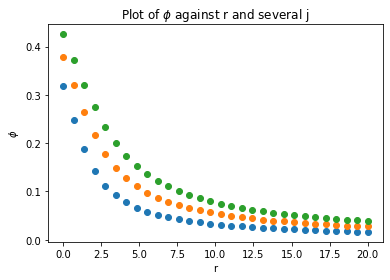

In [124]:
#Setting variables r and j
#r=np.linspace(1,10,20)
#j=np.linspace(0.5,6,5)

#Plot phi for different values of r and j (and fixed u)
#v=np.zeros(np.size(r))
LF=np.zeros(np.size(r))
HF=np.zeros(np.size(r))
MF=np.zeros(np.size(r))

#for m in range(np.size(j)):
#    for k in range(np.size(r)):
#        v[k]=phi(r[k],j[m],u)


jlf1=1
jlf2=2
jhf=3

LF=curves_data[:,jlf1]

MF=curves_data[:,jlf2]


HF=curves_data[:,jhf]
#MF=v.copy()

#HF=v.copy()    

plt.plot(r,LF,'o')
plt.plot(r,MF,'o')
plt.plot(r,HF,'o')

    
plt.xlabel('r')
plt.ylabel('$\phi$')
plt.title('Plot of $\phi$ against r and several j')

In [133]:

Tl1=[1,3,6,7,13,15,19,20,23]
Tl2=[1,3,7,13,15,20,23]

Th=[1,6,23]

rmax=r[np.max([Tl1[-1],Tl2[-1],Th[-1]])]
rmin=r[np.min([Tl1[0],Tl2[0],Th[0]])]

x_train_l1 = r[Tl1, np.newaxis]
y_train_l1 = LF[Tl1, np.newaxis]

x_train_l2 = r[Tl2, np.newaxis]
y_train_l2 = MF[Tl2, np.newaxis]

x_train_h = r[Th, np.newaxis]
y_train_h = HF[Th, np.newaxis]


X_train, Y_train = convert_xy_lists_to_arrays([x_train_l1, x_train_l2, x_train_h], [y_train_l1, y_train_l2, y_train_h])

x_plot = np.linspace(0, rmax, 200)[:, np.newaxis]
X_plot = convert_x_list_to_array([x_plot, x_plot, x_plot])
X_plot_l1 = X_plot[:200]
X_plot_l2 = X_plot[200:400]
X_plot_h = X_plot[400:]


In [134]:
#Create nonlinear model.

from emukit.multi_fidelity.models.non_linear_multi_fidelity_model import make_non_linear_kernels, NonLinearMultiFidelityModel
base_kernel = GPy.kern.RBF
kernels = make_non_linear_kernels(base_kernel, 3, X_train.shape[1] - 1)
nonlin_mf_model = NonLinearMultiFidelityModel(X_train, Y_train, n_fidelities=3, kernels=kernels, 
                                              verbose=True, optimization_restarts=5)
for m in nonlin_mf_model.models:
    m.Gaussian_noise.variance.fix(0)
nonlin_mf_model.optimize()
#Now we compute the mean and variance predictions

lf1_mean_nonlin_mf_model, lf1_var_nonlin_mf_model = nonlin_mf_model.predict(X_plot_l1)
lf1_std_nonlin_mf_model = np.sqrt(lf1_var_nonlin_mf_model)

lf2_mean_nonlin_mf_model, lf2_var_nonlin_mf_model = nonlin_mf_model.predict(X_plot_l2)
lf2_std_nonlin_mf_model = np.sqrt(lf2_var_nonlin_mf_model)

hf_mean_nonlin_mf_model, hf_var_nonlin_mf_model = nonlin_mf_model.predict(X_plot_h)
hf_std_nonlin_mf_model = np.sqrt(hf_var_nonlin_mf_model)


 /usr/local/lib/python3.9/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/5, f = -14.748062083716512
Optimization restart 2/5, f = -14.748062083679233
Optimization restart 3/5, f = -14.748062083717677
Optimization restart 4/5, f = -14.7480620837122
Optimization restart 5/5, f = -14.748062083710717
Optimization restart 1/5, f = -9.221002981215015
Optimization restart 2/5, f = -9.221002930765042
Optimization restart 3/5, f = -9.2210026611199
Optimization restart 4/5, f = -13.83487505686303


 /usr/local/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /usr/local/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 5/5, f = -22.717740054671744
Optimization restart 1/5, f = -0.5240362483188461
Optimization restart 2/5, f = -0.5240362568406867
Optimization restart 3/5, f = -2.1555749486571165
Optimization restart 4/5, f = -0.5240361030052616
Optimization restart 5/5, f = -0.5240350345205809


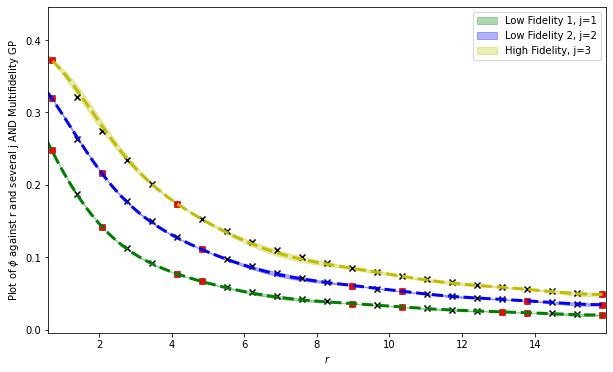

In [135]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
ax.fill_between(x_plot.flatten(), (lf1_mean_nonlin_mf_model - 1.96*lf1_std_nonlin_mf_model).flatten(), 
                 (lf1_mean_nonlin_mf_model + 1.96*lf1_std_nonlin_mf_model).flatten(), color='g', alpha=0.3)

ax.fill_between(x_plot.flatten(), (lf2_mean_nonlin_mf_model - 1.96*lf2_std_nonlin_mf_model).flatten(), 
                 (lf2_mean_nonlin_mf_model + 1.96*lf2_std_nonlin_mf_model).flatten(), color='b', alpha=0.3)

ax.fill_between(x_plot.flatten(), (hf_mean_nonlin_mf_model - 1.96*hf_std_nonlin_mf_model).flatten(), 
                 (hf_mean_nonlin_mf_model + 1.96*hf_std_nonlin_mf_model).flatten(), color='y', alpha=0.3)

ax.plot(x_plot, lf1_mean_nonlin_mf_model, '--', color='g', linewidth=3)
ax.plot(x_plot, lf2_mean_nonlin_mf_model, '--', color='b', linewidth=3)
ax.plot(x_plot, hf_mean_nonlin_mf_model, '--', color='y', linewidth=3)
#ax.scatter(r, LF)
ax.scatter(r, HF,color='k', marker='x')
ax.scatter(r, LF,color='k', marker='x')
ax.scatter(r, MF,color='k', marker='x')
ax.scatter(x_train_l1, y_train_l1, color='r')
ax.scatter(x_train_l2, y_train_l2, color='r')
ax.scatter(x_train_h, y_train_h, color='r')

    

ax.set_xlabel('$r$')
ax.set_ylabel('Plot of $\phi$ against r and several j AND Multifidelity GP')
eps=1e-1
ax.set_xlim(rmin-eps, rmax+eps)
ax.legend(['Low Fidelity 1, j={}'.format(jlf1), 'Low Fidelity 2, j={}'.format(jlf2), 'High Fidelity, j={}'.format(jhf)])

mlai.write_figure('nonlinear-multi-fidelity-model-fit.svg', directory='./uq')